## Simple Linear Regression

In [14]:
# importing basic libraries

import numpy as np

import pandas as pd

from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#import test and train file

train = pd.read_csv('E:/Study/ML/StatQuest/StatQuest/Regularization-Ridge-Lasso-ElasticNet/Training.csv')
test = pd.read_csv('E:/Study/ML/StatQuest/StatQuest/Regularization-Ridge-Lasso-ElasticNet/Test.csv')

# importing linear regressionfrom sklearn

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

# splitting into training and cv for cross validation

X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

# training the model

lreg.fit(x_train,y_train)

# predicting on cv

pred = lreg.predict(x_cv)

# calculating mse

mse = np.mean((pred - y_cv)**2)
mse

1872797.9037593333

In [4]:
# calculating coefficients

coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-8.682120
1,Item_MRP,15.452852


In [5]:
lreg.score(x_cv,y_cv)

0.32673404378745297

## Multiple Linear Regression

In [6]:
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]

#splitting into training and cv for cross validation

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)
counter_nan_train = X.isnull().sum()

## training the model
print(counter_nan_train)
lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

Outlet_Establishment_Year    0
Item_MRP                     0
Item_Weight                  0
dtype: int64


In [7]:
mse = np.mean((pred - y_cv)**2)
print(mse)

#1853431.59

## calculating coefficients

coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
print(coeff)

1975921.264373225
                           0  Coefficient Estimate
0  Outlet_Establishment_Year            -12.050718
1                   Item_MRP             15.561615
2                Item_Weight             -3.783211


In [8]:
print("RScore",lreg.score(x_cv,y_cv))#0.32942
print("Adjusted R^2 ",1 - (1-lreg.score(x_cv, y_cv))*(len(y_cv)-1)/(len(y_cv)-x_cv.shape[1]-1))

RScore 0.3260972881643127
Adjusted R^2  0.3251467906864063


In [9]:
# imputing missing values
train = pd.read_csv('E:/Study/ML/StatQuest/StatQuest/Regularization-Ridge-Lasso-ElasticNet/Training.csv')
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

train['Outlet_Size'].fillna('Small',inplace=True)

# creating dummy variables to convert categorical into numeric values
print(train.shape)
mylist = list(train.select_dtypes(include=['object']).columns)
print(mylist)
dummies = pd.get_dummies(train[mylist], prefix= mylist)
#print(dummies)
train.drop(mylist, axis=1, inplace = True)
print(train.shape)
X = pd.concat([train,dummies], axis =1 )
X.shape

(8523, 12)
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
(8523, 5)


(8523, 1605)

In [10]:
X = X.drop('Item_Outlet_Sales',1)

In [11]:
X.shape

(8523, 1604)

In [12]:
print(X.shape)
X.fillna(X.mean(),inplace = True)
print(X.shape)
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)

# training a linear regression model on train
print(x_train)
lreg.fit(x_train,y_train)

# predicting on cv

pred_cv = lreg.predict(x_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

print(mse)

#1348171.96

# evaluation using r-square

print(lreg.score(x_cv,y_cv))

#0.54831541460870059

(8523, 1604)
(8523, 1604)
      Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
7892    20.250000         0.036326  220.1482                         16   
6992    14.300000         0.066132   89.8856                          4   
4608    12.857645         0.075142  145.8444                         28   
2352    19.000000         0.112097  105.5622                         14   
6298    13.650000         0.025961   80.4302                         14   
468      7.975000         0.014661   85.1250                         11   
7926    14.650000         0.083489  161.3552                         14   
5124    12.857645         0.076483   43.4086                         28   
7843     8.945000         0.087824  261.0910                         11   
7525    15.600000         0.045169  242.9854                          4   
6652    16.700000         0.042611  117.2782                          9   
5458     8.655000         0.088694  122.5756                          6   

1697037.0341174013
0.40371487050609733


Index(['Outlet_Establishment_Year', 'Item_MRP'], dtype='object')
Outlet_Establishment_Year   -11.072525
Item_MRP                     15.614918
dtype: float64


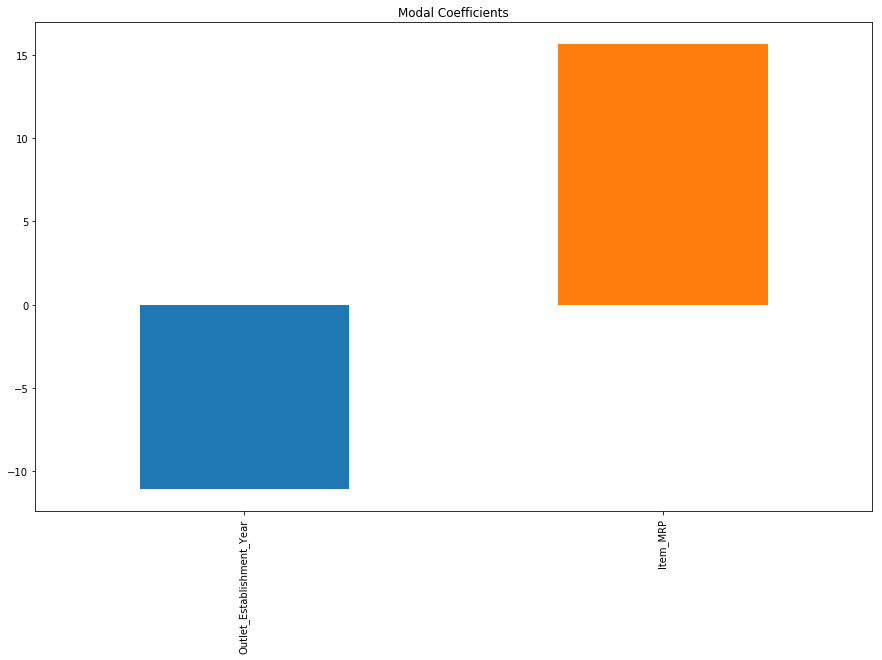

In [16]:
#checking the magnitude of coefficients
predictors = x_train.columns
print(predictors)
coef = Series(lreg.coef_,predictors).sort_values()
print(coef)
plt.figure(figsize=(15,9))
coef.plot(kind='bar', title='Modal Coefficients')

2761978.773682003
0.00650391310843379
0.00650391310843379
Index(['Outlet_Establishment_Year', 'Item_MRP'], dtype='object')
Outlet_Establishment_Year   -11.072525
Item_MRP                     15.614918
dtype: float64


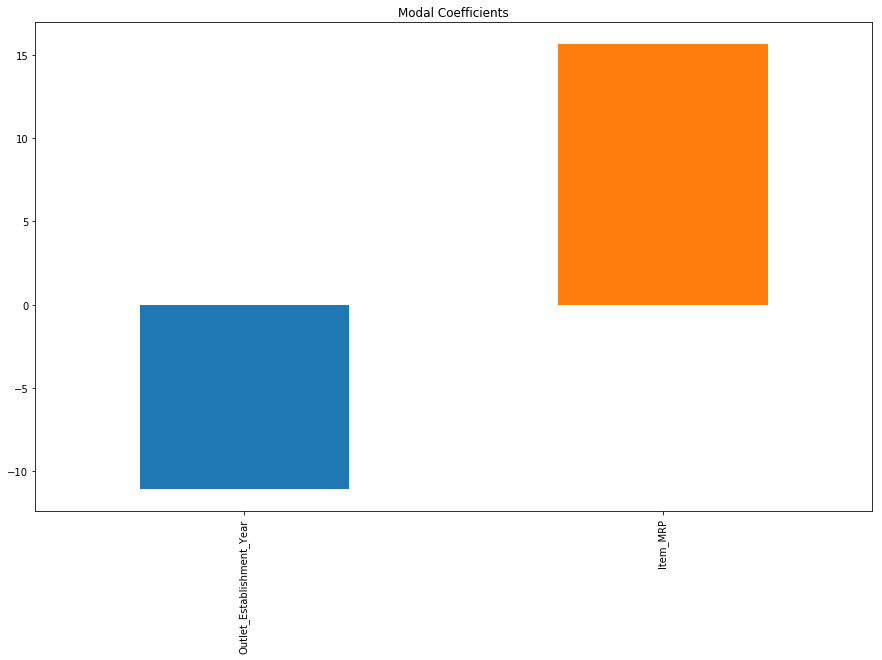

In [17]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=100, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

#calculating mse

mse = np.mean((pred - y_cv)**2)

print(mse)

print(ridgeReg.score(x_cv,y_cv))
from sklearn.metrics import r2_score
print(r2_score(y_cv,pred))
#1348171.96 ## calculating score ridgeReg.score(x_cv,y_cv) 0.5691

predictors = x_train.columns
print(predictors)
coef = Series(lreg.coef_,predictors).sort_values()
print(coef)
plt.figure(figsize=(15,9))
coef.plot(kind='bar', title='Modal Coefficients')

1558716.0263580263
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier_DRA12',
       'Item_Identifier_DRA24', 'Item_Identifier_DRA59',
       'Item_Identifier_DRB01', 'Item_Identifier_DRB13',
       'Item_Identifier_DRB24',
       ...
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object', length=1604)
Item_Weight                      0.000000
Item_Identifier_FDW07           -0.000000
Item_Identifier_FDW04           -0.000000
Item_Identifier_FDW03           -0.000000
Item_Identifier_FDW02            0.000000
Item_Identifier_FDW01           -0.000000
Item_Identifier_FDV60           -0.000000
Item_Identifier_FDV59            0.000000
Item_Identifier_FDV

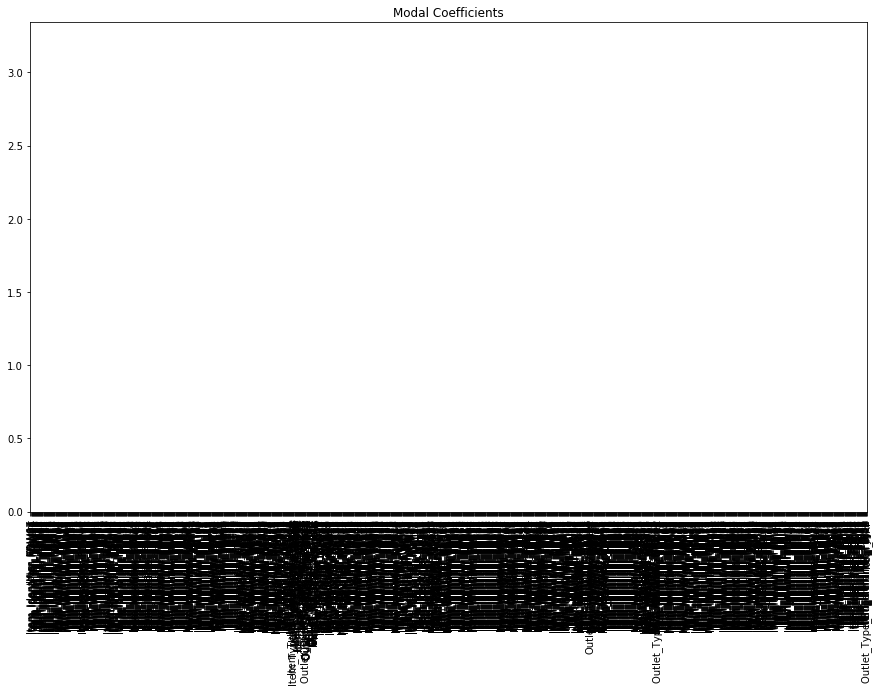

In [164]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=10, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

print(mse)

#1346205.82

lassoReg.score(x_cv,y_cv)

#0.5720
predictors = x_train.columns
print(predictors)
coef = Series(lassoReg.coef_,predictors).sort_values()
print(coef)
plt.figure(figsize=(15,9))
coef.plot(kind='bar', title='Modal Coefficients')

In [155]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_cv)

#calculating mse

mse = np.mean((pred_cv - y_cv)**2)

print(mse )
#1773750.73

print(ENreg.score(x_cv,y_cv))

#0.4504

predictors = x_train.columns
print(pred_cv)
coef = Series(lassoReg.coef_,predictors).sort_values()
print(coef)
plt.figure(figsize=(15,9))
coef.plot(kind='bar', title='Modal Coefficients')lassoReg

1558716.0263580263


0.46462142691125624